### การเชื่อมต่อ Wokwi กับ Serial port

ในหนังสือ "การโปรแกรมไพทอนสำหรับงานควบคุมและฝังตัว" การสื่อสารข้อมูลระหว่างระบบฝังตัวที่จำลองบน Wokwi กับคอมพิวเตอร์หลักกระทำผ่าน IoT 
ซึ่งมีข้อดีคือสามารถควบคุมได้ในระยะไกล แต่ข้อด้อยคืออัตราการรับส่งข้อมูลถูกจำกัด นอกจากนั้นยังประสบปัญหาการเชื่อมต่อ WiFi จำลองของ Wokwi ที่ไม่เสถียร 
ในกรณีที่ต้องการสื่อสารข้อมูลด้วยอัตราที่สูงขึ้น อาจเลือกใช้พอร์ตอนุกรม โดยดัดแปลงส่วนการสื่อสารจากการใช้ไลบรารี MQTT 
เป็นการเชื่อมต่อระหว่างระบบฝังตัวที่จำลองบน Wokwi กับพอร์ตอนุกรมของคอมพิวเตอร์ที่ใช้งานอยู่

ด้านคอมพิวเตอร์หลักจะใช้ไลบรารี pyserial ซึ่งติดตั้งได้โดยคำสั่ง

In [2]:
!pip install pyserial

   ---------------------------------------- 0.0/90.6 kB ? eta -:--:--
   ------------------ --------------------- 41.0/90.6 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 90.6/90.6 kB 1.3 MB/s eta 0:00:00


นำเข้าและตรวจสอบเวอร์ชัน

In [1]:
import serial
serial.__version__

'3.5'

โค้ดด้านล่างนี้ใช้เพื่อแสดงพอร์ตอนุกรมที่ใช้งานได้ในคอมพิวเตอร์ของเรา 
(ซึ่งต้องมีการติดตั้ง virtual serial port โดยโปรแกรม com0com เสียก่อน)

In [2]:
import serial.tools.list_ports
import sys

In [3]:
list = serial.tools.list_ports.comports()
connected = []
for element in list:
    connected.append(element.device)
print("Connected COM ports: " + str(connected))
# compliments of https://stackoverflow.com/questions/12090503/listing-available-com-ports-with-python#14224477
""" Lists serial port names

    :raises EnvironmentError:
        On unsupported or unknown platforms
    :returns:
        A list of the serial ports available on the system
"""
if sys.platform.startswith('win'):
# !attention assumes pyserial 3.x
    ports = ['COM%s' % (i + 1) for i in range(256)]
elif sys.platform.startswith('linux') or sys.platform.startswith('cygwin'):
    # this excludes your current terminal "/dev/tty"
    ports = glob.glob('/dev/tty[A-Za-z]*')
elif sys.platform.startswith('darwin'):
    ports = glob.glob('/dev/tty.*')
else:
    raise EnvironmentError('Unsupported platform')

result = []
for port in ports:
    try:
        s = serial.Serial(port)
        s.close()
        result.append(port)
    except (OSError, serial.SerialException):
        pass
print("Availible COM Ports: " + str(result))

Connected COM ports: ['COM1']
Availible COM Ports: ['COM1', 'COM7', 'COM8']


นำเข้าไลบรารีที่ต้องการใช้งาน

In [4]:
import numpy as np
import matplotlib.pyplot as plt

สร้างวัตถุชื่อ ser โดยกำหนดพอร์ตและความเร็วในการสื่อสาร

In [4]:
ser = serial.Serial('COM8', 115200, timeout=1)

การส่งสตริงไปยังระบบฝังตัวใช้คำสั่งดังนี้

In [14]:
ser.write('r=100'.encode('utf-8'))

5

คำสั่งสำหรับอ่านค่าจากบัฟเฟอร์คือ ser.readline() ซึ่งจะอ่านเพียงบรรทัดเทียว หรือ ser.readlines() จะอ่านค่าทั้งหมด ตัวอย่างการใช้งาน

In [15]:
data = ser.readlines()

In [16]:
data

[b'capture=1\r\n',
 b'datasize=1000\r\n',
 b'r=200\r\n',
 b'datamat = np.array([\r\n',
 b'[0,2.0,0.9978022,3.3,12300.43,1.665934],\r\n',
 b'[0.01,2.0,0.9978022,3.3,7500.379,1.605275],\r\n',
 b'[0.02,2.0,0.9978022,3.3,4620.35,1.524396],\r\n',
 b'[0.03,2.0,0.9995605,3.3,2856.644,1.703736],\r\n',
 b'[0.04,2.0,1.00044,3.3,1816.059,1.668571],\r\n',
 b'[0.05,2.0,1.00044,3.3,1209.453,1.856703],\r\n',
 b'[0.06,2.0,1.00044,3.3,845.4932,1.943736],\r\n',
 b'[0.07,2.0,1.001319,3.3,609.2744,1.840879],\r\n',
 b'[0.08,2.0,1.002198,3.3,467.4439,1.994725],\r\n',
 b'[0.09,2.0,1.002198,3.3,400.0889,1.804835],\r\n',
 b'[0.1,2.0,1.003077,3.3,341.8328,1.765275],\r\n',
 b'[0.11,2.0,1.003956,3.3,306.7799,1.621099],\r\n',
 b'[0.12,2.0,1.004835,3.3,285.6443,1.645714],\r\n',
 b'[0.13,2.0,1.005714,3.3,272.8615,1.493626],\r\n',
 b'[0.14,2.0,1.005714,3.3,282.9373,1.403077],\r\n',
 b'[0.15,2.0,1.006593,3.3,271.1421,1.524396],\r\n',
 b'[0.16,2.0,1.008352,3.3,246.1163,1.541978],\r\n',
 b'[0.17,2.0,1.01978,3.3,34.58511

การล้างค่าในบัฟเฟอร์อินพุต/เอาต์พุต

In [37]:
ser.reset_input_buffer() # flush all data that you don't wanna read

In [38]:
ser.reset_output_buffer()

คำสั่งเมื่อเลิกใช้

In [82]:
ser.close()

ในกรณีที่เก็บข้อมูลในรูปคำสั่งไพทอนเพื่อสร้างเมทริกซ์ เราพบว่าข้อมูลที่อ่านมาได้อาจมีคำสั่งอื่นปะปนมาด้วย เช่น
```python
[b'capture=1\r\n',
 b'datasize=1000\r\n',
 b'r=200\r\n',
 b'datamat = np.array([\r\n',
 b'[0,2.0,0.9978022,3.3,12300.43,1.665934],\r\n',
 b'[0.01,2.0,0.9978022,3.3,7500.379,1.605275],\r\n',
 b'[0.02,2.0,0.9978022,3.3,4620.35,1.524396],\r\n',
 b'[0.03,2.0,0.9995605,3.3,2856.644,1.703736],\r\n',
 b'[0.04,2.0,1.00044,3.3,1816.059,1.668571],\r\n',
 :
 :
 b'[9.95,2.0,2.003516,-3.3,-10.12508,1.530549],\r\n',
 b'])\r\n']
```

ซึ่งเราต้องการเฉพาะส่วน datamat = np.array([[...],[...]]) เท่านั้น และต้องการขจัดอักขระที่ไม่ต้องการ 
(เรียกว่า white space characters) ออก เขียนเป็นฟังก์ชันดังนี้

In [12]:
def extract_and_clean(datalist):
    datastr = ''
    for line in datalist:
        datastr += line.decode().strip()
    idx_start = datastr.rfind("datamat")
    idx_end = datastr.rfind("])")
    datastr = datastr[idx_start:idx_end+2]
    return datastr

ทดสอบขั้นพื้นฐาน

In [4]:
data = [b'capture=1\r\n',
 b'datasize=1000\r\n',
 b'r=200\r\n',
 b'datamat = np.array([\r\n',
 b'[0,2.0,0.9978022,3.3,12300.43,1.665934],\r\n',
 b'[0.01,2.0,0.9978022,3.3,7500.379,1.605275],\r\n',
 b'[0.02,2.0,0.9978022,3.3,4620.35,1.524396],\r\n',
 b'[0.03,2.0,0.9995605,3.3,2856.644,1.703736],\r\n',
 b'[0.04,2.0,1.00044,3.3,1816.059,1.668571],\r\n',
 b'[9.95,2.0,2.003516,-3.3,-10.12508,1.530549],\r\n',
 b'])\r\n']

In [13]:
datastr = extract_and_clean(data)
datastr

'datamat = np.array([[0,2.0,0.9978022,3.3,12300.43,1.665934],[0.01,2.0,0.9978022,3.3,7500.379,1.605275],[0.02,2.0,0.9978022,3.3,4620.35,1.524396],[0.03,2.0,0.9995605,3.3,2856.644,1.703736],[0.04,2.0,1.00044,3.3,1816.059,1.668571],[9.95,2.0,2.003516,-3.3,-10.12508,1.530549],])'

In [16]:
exec(datastr)

In [17]:
datamat

array([[ 0.000000e+00,  2.000000e+00,  9.978022e-01,  3.300000e+00,
         1.230043e+04,  1.665934e+00],
       [ 1.000000e-02,  2.000000e+00,  9.978022e-01,  3.300000e+00,
         7.500379e+03,  1.605275e+00],
       [ 2.000000e-02,  2.000000e+00,  9.978022e-01,  3.300000e+00,
         4.620350e+03,  1.524396e+00],
       [ 3.000000e-02,  2.000000e+00,  9.995605e-01,  3.300000e+00,
         2.856644e+03,  1.703736e+00],
       [ 4.000000e-02,  2.000000e+00,  1.000440e+00,  3.300000e+00,
         1.816059e+03,  1.668571e+00],
       [ 9.950000e+00,  2.000000e+00,  2.003516e+00, -3.300000e+00,
        -1.012508e+01,  1.530549e+00]])

ทดสอบกับข้อมูลจริง

In [18]:
ser = serial.Serial('COM8', 115200, timeout=1)

In [74]:
ser.write('r=200\r\n'.encode('utf-8'))

7

เนื่องจากในการใช้งานจริงอาจมีการอ่านค่าจาก serial buffer หลายครั้งจนกว่าข้อมูลจะหมด ดังนั้นต้องเขียนโค้ดเพื่อตรวจสอบ

In [51]:
import time

In [54]:
def isfinished(readbuffer):
    finish_flag = False
    if readbuffer == []:
        finish_flag = True
    for line in readbuffer:
        if b'])' in line:
            finish_flag = True
    return finish_flag

In [75]:
data = []
finished = False
while not finished:
    datalines = ser.readlines()
    data += datalines
    finished = isfinished(datalines)
    time.sleep(1)

In [76]:
data

[b'capture=0\r\n',
 b'r=100\r\n',
 b'capture=1\r\n',
 b'r=200\r\n',
 b'datamat = np.array([\r\n',
 b'[0,200.0,99.34065,3.3,12319.9,141.7143],\r\n',
 b'[0.01,200.0,99.34065,3.3,7512.332,148.6593],\r\n',
 b'[0.02,200.0,99.34065,3.3,4627.794,149.2747],\r\n',
 b'[0.03,200.0,99.34065,3.3,2897.075,156.3077],\r\n',
 b'[0.04,200.0,99.25274,3.3,1876.493,148.2198],\r\n',
 b'[0.05,200.0,99.25274,3.3,1246.408,152.8791],\r\n',
 b'[0.06,200.0,99.25274,3.3,868.3609,163.8681],\r\n',
 b'[0.07,200.0,99.25274,3.3,641.5368,157.4505],\r\n',
 b'[0.08,200.0,99.25274,3.3,505.4464,176.8791],\r\n',
 b'[0.09,200.0,99.25274,3.3,423.7962,185.6703],\r\n',
 b'[0.1,200.0,99.25274,3.3,374.8101,168.0879],\r\n',
 b'[0.11,200.0,99.25274,3.3,345.4224,155.1648],\r\n',
 b'[0.12,200.0,99.60439,3.3,256.4102,174.6813],\r\n',
 b'[0.13,200.0,99.60439,3.3,273.9685,186.989],\r\n',
 b'[0.14,200.0,99.69231,3.3,266.6628,175.8242],\r\n',
 b'[0.15,200.0,99.78021,3.3,262.1755,178.4615],\r\n',
 b'[0.16,200.0,99.78021,3.3,277.2288,184.703

In [77]:
len(data)

306

In [78]:
datastr = extract_and_clean(data)
datastr

'datamat = np.array([[0,200.0,99.34065,3.3,12319.9,141.7143],[0.01,200.0,99.34065,3.3,7512.332,148.6593],[0.02,200.0,99.34065,3.3,4627.794,149.2747],[0.03,200.0,99.34065,3.3,2897.075,156.3077],[0.04,200.0,99.25274,3.3,1876.493,148.2198],[0.05,200.0,99.25274,3.3,1246.408,152.8791],[0.06,200.0,99.25274,3.3,868.3609,163.8681],[0.07,200.0,99.25274,3.3,641.5368,157.4505],[0.08,200.0,99.25274,3.3,505.4464,176.8791],[0.09,200.0,99.25274,3.3,423.7962,185.6703],[0.1,200.0,99.25274,3.3,374.8101,168.0879],[0.11,200.0,99.25274,3.3,345.4224,155.1648],[0.12,200.0,99.60439,3.3,256.4102,174.6813],[0.13,200.0,99.60439,3.3,273.9685,186.989],[0.14,200.0,99.69231,3.3,266.6628,175.8242],[0.15,200.0,99.78021,3.3,262.1755,178.4615],[0.16,200.0,99.78021,3.3,277.2288,184.7033],[0.17,200.0,99.86813,3.3,268.4176,194.4615],[0.18,200.0,99.95604,3.3,263.0318,199.2967],[0.19,200.0,100.044,3.3,259.6964,182.5934],[0.2,200.0,100.1319,3.3,257.5937,186.9011],[0.21,200.0,100.2198,3.3,256.233,196.1319],[0.22,200.0,100.3077

In [79]:
exec(datastr)

In [80]:
datamat

array([[ 0.000000e+00,  2.000000e+02,  9.934065e+01,  3.300000e+00,
         1.231990e+04,  1.417143e+02],
       [ 1.000000e-02,  2.000000e+02,  9.934065e+01,  3.300000e+00,
         7.512332e+03,  1.486593e+02],
       [ 2.000000e-02,  2.000000e+02,  9.934065e+01,  3.300000e+00,
         4.627794e+03,  1.492747e+02],
       ...,
       [ 2.970000e+00,  2.000000e+02,  1.937582e+02, -3.300000e+00,
        -3.363007e+01,  1.494505e+02],
       [ 2.980000e+00,  2.000000e+02,  1.938461e+02, -3.300000e+00,
        -3.043399e+01,  1.611429e+02],
       [ 2.990000e+00,  2.000000e+02,  1.938461e+02, -3.300000e+00,
        -1.077688e+01,  1.554286e+02]])

<Figure size 800x800 with 0 Axes>

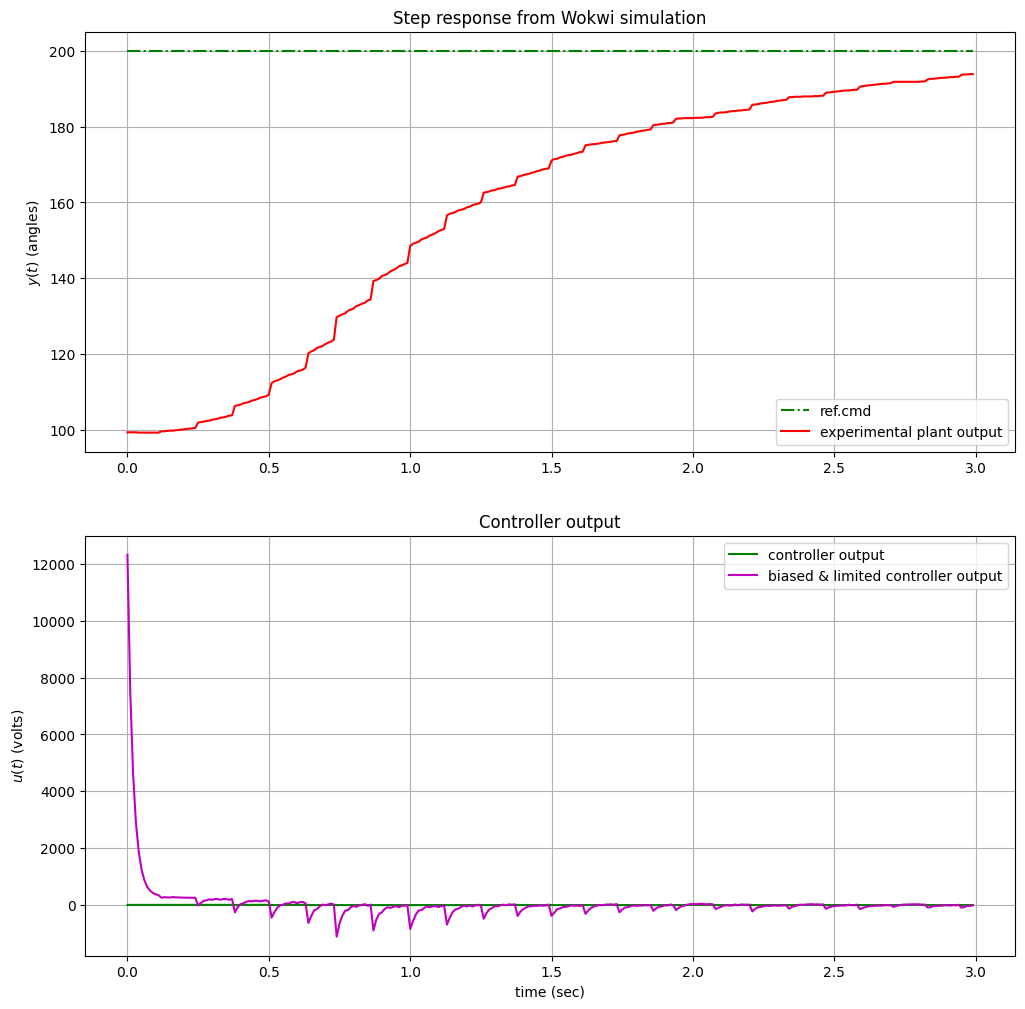

In [81]:
# extract vectors from datamat
tvec = datamat[:,0]
rvec = datamat[:,1]
yvec = datamat[:,2]
uvec = datamat[:,3] 
ulimvec = datamat[:,4]
    

plt.figure(figsize=(8,8))
# plot the response
fig, (ax1, ax2) = plt.subplots(2,figsize=(12,12))
ax1.set_title('Step response from Wokwi simulation')
ax1.plot(tvec, rvec,'g-.', tvec, yvec,'r-')
#ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$y(t)$ (angles)')
ax1.legend(['ref.cmd', 'experimental plant output'])
ax1.grid(True)

ax2.plot(tvec, uvec, 'g-',tvec,ulimvec,'m-')
ax2.set_xlabel('time (sec)')
ax2.set_ylabel('$u(t)$ (volts)')
ax2.grid(True)
ax2.legend(['controller output','biased & limited controller output'])
ax2.set_title('Controller output')
plt.show()



ทดสอบการใช้ queue

In [36]:
import queue
q = queue.Queue()

In [6]:
ser = serial.Serial('COM8', 115200, timeout=1)

In [40]:
ser.write('$streaming=0\r\n'.encode('utf-8'))

14

In [41]:
data = ser.readlines()

In [42]:
data

[b'0,100.0,129.6703,-3.3,-2208.334,95.82417\r\n',
 b'0.1,100.0,129.6703,3.3,819.2197,111.5604\r\n',
 b'0.2,100.0,129.5824,-3.3,-471.8032,108.8352\r\n',
 b'0.3,100.0,129.4945,3.3,81.82767,130.1099\r\n',
 b'0.4,100.0,129.2308,-3.3,-142.0218,150.945\r\n',
 b'0.5,100.0,128.967,-3.3,-44.99767,157.011\r\n',
 b'0.6,100.0,128.7912,-3.3,-92.034,173.3626\r\n',
 b'0.7,100.0,128.1758,-3.3,-38.44706,158.5934\r\n',
 b'0.8,100.0,127.2967,-3.3,-39.18579,170.1099\r\n',
 b'0.9,100.0,125.6264,3.3,23.74831,182.7692\r\n',
 b'1.0,100.0,124.9231,-3.3,-68.07588,185.9341\r\n',
 b'1.1,100.0,123.6923,3.3,13.51572,179.8681\r\n',
 b'1.2,100.0,122.3736,-3.3,-9.668167,177.5824\r\n',
 b'1.3,100.0,120.3516,3.3,58.23269,163.4286\r\n',
 b'1.4,100.0,119.6483,-3.3,-60.37792,148.2198\r\n',
 b'1.5,100.0,118.1538,3.3,52.33005,138.7253\r\n',
 b'1.6,100.0,116.6593,3.3,10.40702,145.6703\r\n',
 b'1.7,100.0,114.8132,3.3,60.92735,146.3736\r\n',
 b'1.8,100.0,114.3736,-3.3,-57.5237,138.989\r\n',
 b'1.9,100.0,113.4066,3.3,34.3641,140

In [43]:
for line in data:
    dstr = line.decode().strip()
    if '$' not in dstr:
        q.put(dstr)

In [44]:
q.queue[0]

'0,100.0,129.6703,-3.3,-2208.334,95.82417'

In [34]:
q.get()

'0,100.0,129.5824,-3.3,-6005.232,336.8791'

In [35]:
q.queue[0]

'0.01,100.0,129.4066,-3.3,-3602.948,333.5385'

### โปรแกรมสร้างพอร์ตอนุกรมเสมือน (virtual serial port)

การจำลองบน Wokwi แตกต่างจากระบบฝังตัวจริงคือ ข้อมูลที่พิมพ์ออกบนหน้าต่าง Serial monitor 
มิใช่พอร์ตอนุกรมที่เป็นฮาร์ดแวร์ ดังนั้นเราไม่สามารถใช้ pyserial สื่อสารกับ Wokwi ได้โดยตรง
แต่จะต้องสร้างวัตถุที่เรียกว่า พอร์ตอนุกรมเสมือน (virtual serial port) ขึ้นมาเสียก่อน 
ซึ่งก็คือซอฟต์แวร์ที่ทำหน้าที่แปลงข้อมูลจากเบราเซอร์เป็นเหมือนกับข้อมูลจากพอร์ตอนุกรมนั่นเอง 
ซอฟต์แวร์ที่ใช้ในการสร้างพอร์ตอนุกรมเสมือนมีหลายผลิตภัณฑ์ทั้งฟรีและเสียเงิน บางผลิตภัณฑ์ทดสอบแล้วใช้งานไม่ได้ตามต้องการ 
ในที่นี้จะใช้ซอฟต์แวร์บน Windows 11 หลังจากทดสอบไปได้ระดับหนึ่งพบว่าซอฟต์แวร์ com0com เวอร์ชันเก่าคือ 2.2.2.0 
สามารถใช้งานได้ (เวอร์ชันใหม่กว่านี้มีปัญหา) 

เนื่องจากขั้นตอนในการติดตั้งยากที่จะบรรยาย ผู้เขียนจึงได้ทำเป็นวีดีโอที่ลิงก์นี้ https://youtu.be/7BJiWQn4hBs?si=yoliPItKDH_TEn3S



#### โค้ดด้าน Wokwi

การที่จะทำให้ Wokwi สามารถเชื่อมต่อกับพอร์ตอนุกรมเสมือนที่สร้างโดย com2com จะต้องเพิ่มเติมโค้ดใน diagram.json 
ดังนี้ (การทดสอบนี้ใช้ ESP32)

ในส่วนของ "parts": เพิ่ม
```json
    {
      "id": "serial",
      "type": "wokwi-serial-port",
      "attrs": { "baud": "115200" }
    }
```

ในส่วน "connections": เพิ่ม
```json
    ["esp:TX0", "serial:RX", "",[]],
    ["esp:RX0", "serial:TX", "",[]],
    ["$serialMonitor:RX", "serial:RX", "",[]],
    ["$serialMonitor:TX", "serial:TX", "",[]],    

```

โดยสองบรรทัดสุดท้ายมีไว้เพื่อแสดงข้อมูลบนหน้าต่างของ Serial monitor ของ Wokwi ตามปกติ 
หากไม่ต้องการก็ลบทิ้งไปได้

#### สร้าง GUI โดยใช้ไลบรารี tkinter

สร้าง GUI ลักษณะคล้ายกับที่ใช้ในหนังสือ แต่สื่อสารข้อมูลผ่าน virtual serial port แทน paho MQTT 
โดยในขั้นต้นทดลองกับตัวควบคุมข้อต่อเดี่ยวหุ่นยนต์ ทางด้าน wokwi project ใช้ลิงก์นี้

https://wokwi.com/projects/396312701017628673
    
จุดที่มีการแก้ไข/เพิ่มเติม

* ปิดหรือเปิดโหมดการรับส่งข้อมูล โดยเพิ่มตัวแปรชื่อ 
streaming = 0/1 (pause/streaming)
* เนื่องจาก vcp มีการเอคโค่คำสั่ง ดังนั้นจะเพิ่มอักขระ $ ในคำสั่งและข้อความตอบสนอง เพื่อขจัดออกด้าน GUI
* จากการทดลองพบว่า serial.readlines() ทำงานได้ไม่ดีกับ Matplotlib animation 
เพราะจะทำให้โปรแกรมค้าง จึงเลือกใช้ serial.readline() เพื่ออ่านเพียงบรรทัดเดียว 
ปัญหาคือความสัมพันธ์กันระหว่างอัตรารับและส่งของทั้งสองด้านต้องเหมาะสม หากด้าน Wokwi 
มีอัตราสูงกว่าจะส่งผลให้การจำลองเกิดการหน่วงเวลา เนื่องจากข้อมูลสะสมอยู่ในบัฟเฟอร์ ซึ่งอาจต้องมีการล้างทิ้งไป 
แต่หากด้าน GUI มีอัตราอ่านสูงกว่า จะอ่านค่าได้เป็น [] มีผลทำให้โปรแกรมผิดพลาดได้ วิธีแก้ไขคือเพื่มเงื่อนไข if 
เพื่อตรวจสอบว่าข้อมูลที่แยกแล้วมีจำนวนเท่ากับที่ต้องการก่อนจะเขียนลงบนตัวแปร 

โปรแกรมด้าน Jupyter notebook อยู่ในไฟล์ dcmcontrol_ser_tk.ipynb

#### ใช้ VSP แทน IoT ในการจำลองหุ่นยนต์ในบทที่ 8

ตัวอย่างในบทที่ 8 เดิมได้ใช้ NETPIE เป็นตัวเชื่อมต่อระหว่าง Wokwi กับ Jupyter notebook 
ซึ่งเราสามารถแทนการสื่อสารโดยใช้่ VSP โดยวิธีการเดียวกัน 

* r2_ser.ipynb : การจำลองหุ่นยนต์ 2 ก้านต่อ
* ddtk1_ser.ipynb : หุ่นยนต์เคลื่อนที่สู่เป้าหมายโดยไม่มีสิ่งกีดขวาง
* ddtk2_ser.ipynb : หุ่นยนต์เคลื่อนที่ในกริดเวิลด์ขนาด 6 x 6
* ddtk3_ser.ipynb : หุ่นยนต์เคลื่อนที่ในกริดเวิลด์ขนาด n x n



<div align="center">
<img src="https://drive.google.com/thumbnail?id=13bzT7Rmy3bzvE7TiS0yfQo94kpxMuipF" alt="dewninja"/>
</div>
<div align="center">dew.ninja 2024</div>